Best MAPE: 0.8349486589431763 at epoch 11


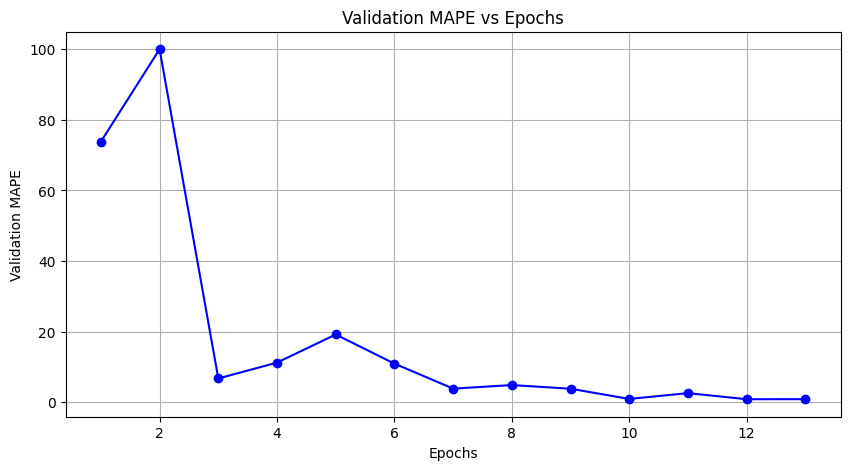

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the JSON file
with open('runs/wacv_2024_seed0/crop_yield/training_convlstm_debug/trainlog.json', 'r') as file:
    data = json.load(file)

# Extracting val_mape and epochs
epochs = list(map(int, data.keys()))
val_mape = [data[str(epoch)]['val_mape'] for epoch in epochs]
train_mape=[data[str(epoch)]['val_mape'] for epoch in epochs]

# val_mape = [(mape) for mape in val_mape]
# best_mape = min(val_mape)
# print(f'Best MAPE: {best_mape} at epoch {val_mape.index(best_mape)}')
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_mape, marker='o', linestyle='-', color='b')
plt.title('Validation MAPE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAPE')
plt.grid(True)
plt.show()

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob

runs = glob.glob('runs/wacv_2024_seed0/crop_yield/*')
print(runs)

# # Load the data from the JSON file
# with open('runs/wacv_2024_seed0/crop_yield/0_1_debug/trainlog.json', 'r') as file:
#     data = json.load(file)

# # Extracting val_mape and epochs
# epochs = list(map(int, data.keys()))
# val_mape = [data[str(epoch)]['val_mape'] for epoch in epochs]

# val_mape = [np.log(mape) for mape in val_mape]

# # Plotting the data
# plt.figure(figsize=(10, 5))
# plt.plot(epochs, val_mape, marker='o', linestyle='-', color='b')
# plt.title('Validation MAPE vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAPE')
# plt.grid(True)
# plt.show()

['runs/wacv_2024_seed0/crop_yield/0_1_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_0_debug', 'runs/wacv_2024_seed0/crop_yield/fusion_pixel_attn_0_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_pixelwise_0_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_pixelwise_0_debug_debug']


In [16]:
import numpy as np
# RdYlGn

def run(run):
    pred_mask = np.load(f'val_results/seed0/val/crop_yield/{run}.npy')
    gt_mask = np.load(f'val_results/seed0/val/crop_yield/{run}_gt.npy')
    sickle_mask = np.load(f'val_results/seed_sickle/val/crop_yield/{run}.npy')
    # print(pred_mask)
    values = []
    valuesgt = []
    sicklevalues = []
    for i in range(pred_mask.shape[0]):
        for j in range(pred_mask.shape[1]):
            if pred_mask[i, j] <= 0: pred_mask[i, j] = 0
            if gt_mask[i, j] == -1:
                pred_mask[i, j] = 0
                sickle_mask[i, j] = 0
            else:
                values.append(pred_mask[i, j])
                valuesgt.append(gt_mask[i, j])
                sicklevalues.append(sickle_mask[i, j])
                
    for i in range(pred_mask.shape[0]):
        for j in range(pred_mask.shape[1]):
            if gt_mask[i, j] == -1:
                continue
            else:
                pred_mask[i, j] =np.mean(values)
                gt_mask[i, j] = np.mean(valuesgt)
                sickle_mask[i, j] = np.mean(sicklevalues)
    

    print(np.mean(values)) #68.57
    print(np.mean(valuesgt)) #108.75
    print(np.mean(sicklevalues)) #130.36
    return pred_mask, gt_mask, sickle_mask

pred_mask, gt_mask, sickle_mask = run('1_3')


98.40017
112.72727
170.45558


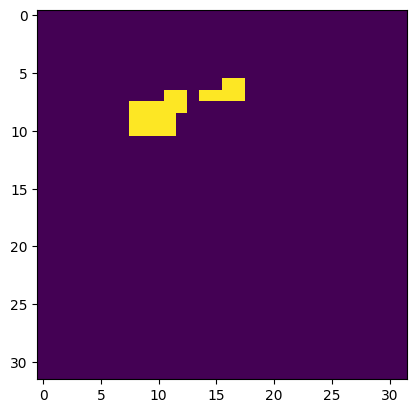

In [134]:
import matplotlib.pyplot as plt
#do 0 where less than 0
pred_mask[pred_mask < 0] = 0

plt.imshow(gt_mask[:, :])

In [1]:
values = []
valuesgt = []
sicklevalues = []
for i in range(pred_mask.shape[0]):
    for j in range(pred_mask.shape[1]):
        if gt_mask[i, j] == -1 or pred_mask <= 0:
            pred_mask[i, j] = 0
            sickle_mask[i, j] = 0
        else:
            values.append(pred_mask[i, j])
            valuesgt.append(gt_mask[i, j])
            sicklevalues.append(sickle_mask[i, j])
            
for i in range(pred_mask.shape[0]):
    for j in range(pred_mask.shape[1]):
        if gt_mask[i, j] == -1:
            continue
        else:
            pred_mask[i, j] =np.mean(values)

NameError: name 'pred_mask' is not defined

In [125]:
print(np.mean(values)) #68.57
print(np.mean(valuesgt)) #108.75
print(np.mean(sicklevalues)) #130.36

104.10883
133.33334
99.7763


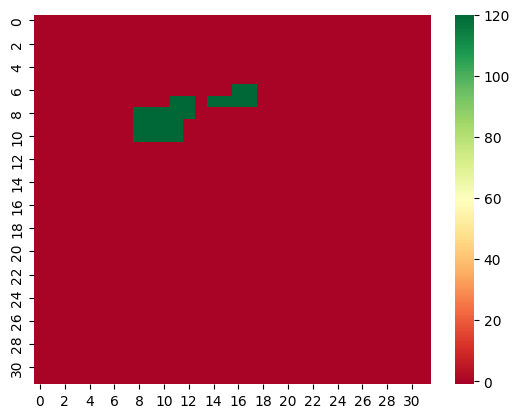

In [136]:
#with color bar for annotation
import seaborn as sns
a = sns.heatmap(pred_mask,vmin=-1, vmax=120, cmap='RdYlGn')
fig = a.get_figure()
fig.savefig('heatmap_drop.pdf')

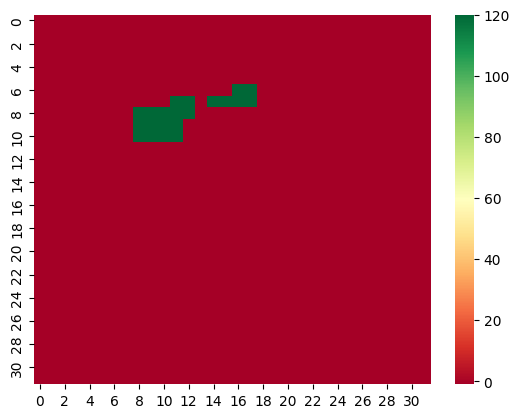

In [137]:
a = sns.heatmap(gt_mask,vmin=-1, vmax=120, cmap='RdYlGn')

fig = a.get_figure()
fig.savefig('heatmap_gt.pdf')

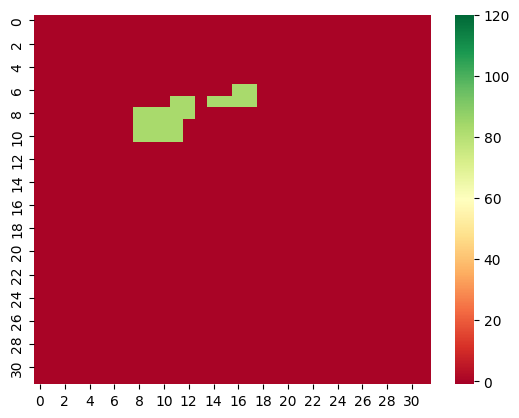

In [138]:
a = sns.heatmap(sickle_mask,vmin=-1, vmax=120, cmap='RdYlGn')
fig = a.get_figure()
fig.savefig('heatmap_sickle.pdf')

In [82]:
print(np.mean(values))

68.57883


In [5]:
import torch

a = torch.randn(4, 4)
a.view(-1)

tensor([-1.0774, -1.4171, -0.9110, -0.3042, -1.5742, -1.0427,  1.1851, -0.2326,
         0.2997, -0.4528, -0.7866,  0.0123,  0.8150, -0.4864, -2.2832, -0.8164])